## W207 EDA Attempts

### Import Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="ticks")  # default style

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
#from keras import metrics
import keras_tuner as kt
from keras_tuner import HyperParameters


tf.get_logger().setLevel('INFO')

### Import Data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = pd.DataFrame(breast_cancer_wisconsin_original.data.features)
y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

ConnectionError: Error connecting to server

### Perform EDA

In [ ]:
X

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1
695,2,1,1,1,2,1.0,1,1,1
696,5,10,10,3,7,3.0,8,10,2
697,4,8,6,4,3,4.0,10,6,1


<Axes: ylabel='Count'>

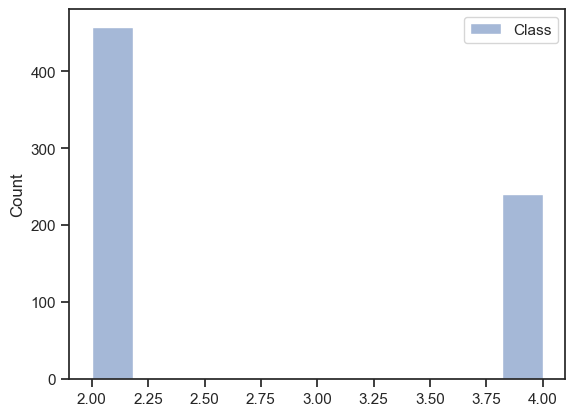

In [ ]:
sns.histplot(y)

<Axes: xlabel='Clump_thickness', ylabel='Count'>

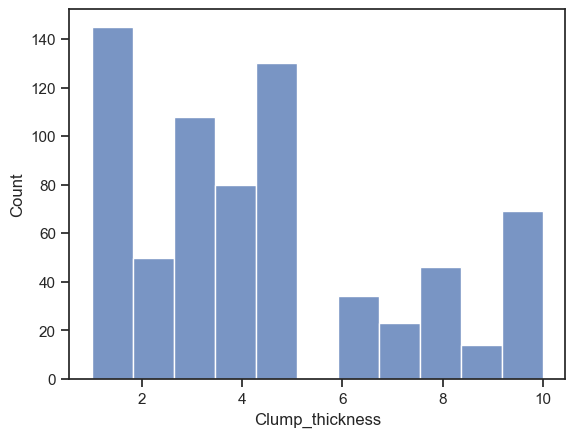

In [ ]:
sns.histplot(X.Clump_thickness)

(array([579.,  35.,  33.,  12.,   6.,   3.,   9.,   8.,   0.,  14.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

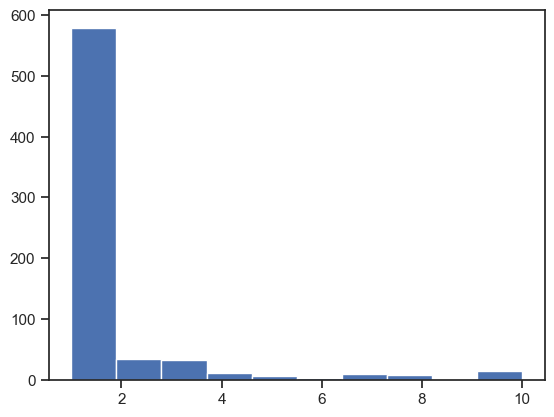

In [ ]:
plt.hist(X.Mitoses)

### Remove empty values

In [ ]:
na_val = X[X.isnull().any(axis = 1)].index

X = X.drop(na_val)
y = y.drop(na_val)
print(len(X))
print(len(y))

683
683


In [ ]:
# change Y from 2,4 to 0,1 
y = np.where(y == 2, 0, 1)

### Perform Train/Test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state=1234)

(array([270.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 139.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

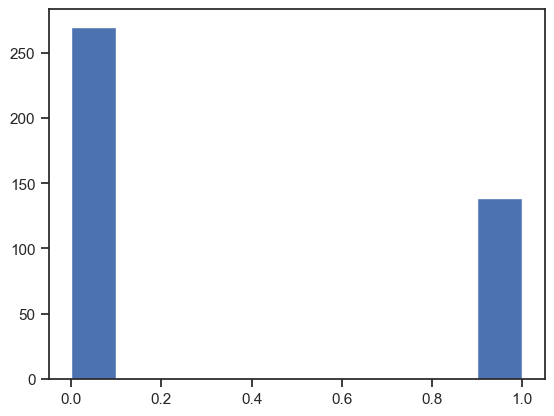

In [ ]:
plt.hist(Y_train)

In [ ]:
# remove rows from majority class
#Y_train.to_numpy()


print(f"Size of 0 Class: {len(np.where(Y_train == 0)[0])}")
print(f"Size of 1 Class: {len(np.where(Y_train != 0)[0])}")
#y = dataset.iloc[:, y.shape[0]].values

Size of 0 Class: 270
Size of 1 Class: 139


In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(409, 9)
(137, 9)
(137, 9)


### Normalize Data

In [ ]:
X_train.describe()
## all columns will need to be normalized 

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,409.000000,409.00000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,4.420538,2.93643,3.092910,2.814181,3.158924,3.437653,3.347188,2.672372,1.572127
std,2.824815,2.91394,2.921552,2.833569,2.197743,3.592837,2.395205,2.953105,1.767158
min,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.00000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,4.00000,5.000000,4.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
# use standard scaler to normalize data relative to X_training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
# reduce majority class to match the minority class size
X_train_2 = np.array(X_train[np.where(Y_train == 0)[0][:len(np.where(Y_train != 0)[0])],:])
X_train_4 = np.array(X_train[np.where(Y_train != 0)[0],:])

print(X_train_2.shape[0])
print(X_train_4.shape[0])
X_train_merged = np.concatenate((X_train_2, X_train_4), axis = 0)
Y_train_merged = np.concatenate((np.zeros(len(np.where(Y_train != 0)[0])) * 0, np.ones(len(np.where(Y_train != 0)[0]))), axis = 0)

print(X_train_merged.shape)
print(Y_train_merged.shape)

139
139
(278, 9)
(278,)


### Shuffling data

In [ ]:
np.random.seed(0)

np.random.shuffle(X_train_merged)
np.random.shuffle(Y_train_merged)


<Axes: ylabel='Count'>

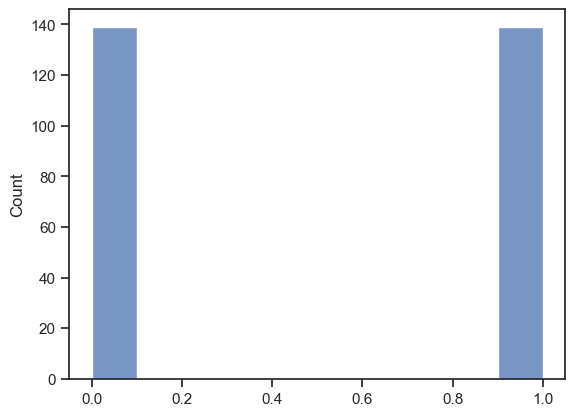

In [ ]:
sns.histplot(Y_train_merged)

# Logistic Regression

In [ ]:
def build_model(num_features, learning_rate):
    tf.keras.backend.clear_session()
    tf.random.set_seed(0)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(
        units = 1, 
        input_shape=[num_features],   # input dim
        use_bias=True,               # use a bias (intercept) param
        activation="sigmoid",
    )
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
    
    return model

In [ ]:
model_log = build_model(X_train_merged.shape[1], 0.001)

In [ ]:
model_log.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_log.fit(
    x = X_train_merged,
    y = Y_train_merged,
    epochs = 5,
    validation_data = (X_val, Y_val)
)

Epoch 1/5


2025-04-09 18:27:41.699596: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - binary_accuracy: 0.4950 - loss: 1.0815 - val_binary_accuracy: 0.9197 - val_loss: 0.2985
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - binary_accuracy: 0.4950 - loss: 1.0764 - val_binary_accuracy: 0.9197 - val_loss: 0.3006
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - binary_accuracy: 0.4950 - loss: 1.0715 - val_binary_accuracy: 0.9197 - val_loss: 0.3026
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - binary_accuracy: 0.4950 - loss: 1.0665 - val_binary_accuracy: 0.9197 - val_loss: 0.3046
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - binary_accuracy: 0.4950 - loss: 1.0616 - val_binary_accuracy: 0.9197 - val_loss: 0.3067


### Hyperparameter tuning

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
monitor='val_loss', 
verbose=1,
patience=2,
mode='min',
restore_best_weights=True)

In [ ]:
tf.random.set_seed(0)

tf.keras.backend.clear_session()
# create build_model_tuner take takes a hyperparameter for tuning
class MyHyperModel(kt.HyperModel):
    def build(self, hp):
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(
            units=1,        # output dim
            input_shape=[X_train_merged.shape[1]],   # input dim
            use_bias=True,               
            activation="sigmoid"
        ))
        optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Float(name = 'learning_rate', min_value = 0.0001, max_value = 0.01, step = 0.0001))
        model.compile(loss=keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics = [keras.metrics.BinaryAccuracy()])
        return model

    def fit(self, hp, model, *args, **kwargs):
            return model.fit(
                *args,
                **kwargs,
            )

hypermodel = MyHyperModel()

tuner = kt.RandomSearch(
    hypermodel,
    objective = 'val_binary_accuracy',
    max_trials = 20,
    directory='my_dir',
    overwrite = True
)

tuner.search(x = X_train_merged,
    y = Y_train_merged,
    epochs = 10,
    callbacks=[early_stopping],
    validation_data = (X_val, Y_val))

Trial 20 Complete [00h 00m 02s]
val_binary_accuracy: 0.6496350169181824

Best val_binary_accuracy So Far: 0.956204354763031
Total elapsed time: 00h 00m 52s


In [ ]:
model_final = tuner.get_best_models(1)[0]


print(f"Test aggregate accuracy: {model_final.evaluate(x = X_test, y = Y_test, verbose = 0)[1] :%}")


/Users/protech/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/protech/anaconda3/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Test aggregate accuracy: 95.620435%


### Confusion Matrix

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step 


2025-04-11 20:02:59.747140: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


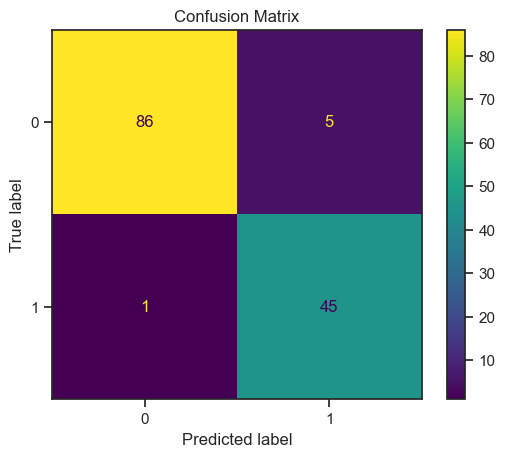

In [ ]:
y_predicted = model_tf.predict(x = X_test)
# convert probability numbers into binary for confusion matrix 
y_predicted = np.where(y_predicted >= 0.5, 1, 0)

## split data into sneaker and nonsneaker 
# create confusion matrix 
con_matrix = confusion_matrix(y_true= Y_test, y_pred= y_predicted)

disp = ConfusionMatrixDisplay(con_matrix)

disp.plot()
disp.ax_.set_title("Confusion Matrix")
plt.show()